In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
items=pd.read_csv('./items.csv')
item_categories=pd.read_csv('./item_categories.csv')
salestrain=pd.read_csv('./sales_train_v2.csv')
shops=pd.read_csv('./shops.csv')
submission=pd.read_csv('./sample_submission.csv')

In [6]:
train = salestrain.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_')
train=train.drop(['item_id_', 'shop_id_', 'item_category_id_'],axis=1)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [7]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [8]:
test=pd.read_csv('./test.csv')
test_shop_ids=test.shop_id.unique()
test_item_ids=test.item_id.unique()

In [9]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [10]:
# Only shops that exist in test set.
train = train[train['shop_id'].isin(test_shop_ids)]
# Only items that exist in test set.
train = train[train['item_id'].isin(test_item_ids)]

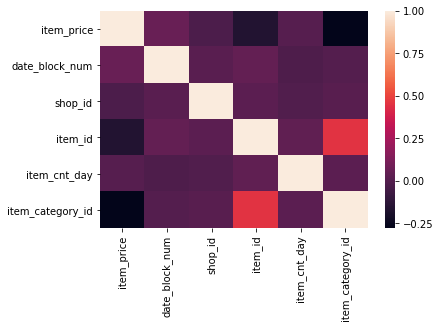

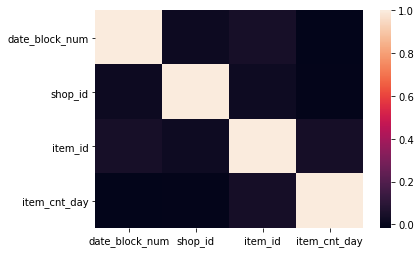

In [11]:
import seaborn as sns
corr=train[['item_price','date_block_num','shop_id','item_id','item_cnt_day','item_category_id']]
corr = corr.corr()
corr1=train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day']]
corr1=corr1.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.figure(0)
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)


<Figure size 432x288 with 0 Axes>

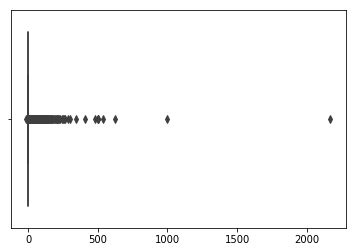

<Figure size 432x288 with 0 Axes>

In [12]:
sns.boxplot(train[['item_cnt_day']])
plt.figure(0)


In [13]:
train_monthly = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day']]
print(train_monthly.head())
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)
print(train_monthly.head())

train_monthly = train_monthly.agg({'item_cnt_day':['sum']})
print(train_monthly.head())


          date  date_block_num  shop_id  item_id  item_cnt_day
0   02.01.2013               0       59    22154           1.0
10  03.01.2013               0       25     2574           2.0
11  05.01.2013               0       25     2574           1.0
12  07.01.2013               0       25     2574           1.0
13  08.01.2013               0       25     2574           2.0
               date  date_block_num  shop_id  item_id  item_cnt_day
21124    01.01.2013               0       28    16135           1.0
54645    01.01.2013               0        7     8012           1.0
106792   01.01.2013               0       37     2703           1.0
54571    01.01.2013               0        7    10786           1.0
47497    01.01.2013               0       15     2308           1.0
45604    01.01.2013               0       15    18669           1.0
56913    01.01.2013               0       14     1523           1.0
45676    01.01.2013               0       15    19080           1.0
15689    0

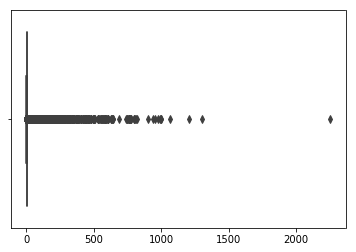

In [14]:
train_monthly.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt']
sns.boxplot(train_monthly[['item_cnt']])

In [15]:
train_monthly = train_monthly.query('item_cnt >= 0 and item_cnt <= 20')
# Label
train_monthly['item_cnt_month'] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt'].shift(-1)
############################################################################33

In [16]:
train_monthly

,date_block_num,shop_id,item_id,item_cnt,item_cnt_month
0,0,2,33,1.0,2.0
1,0,2,482,1.0,1.0
2,0,2,491,1.0,1.0
3,0,2,839,1.0,1.0
4,0,2,1007,3.0,1.0
5,0,2,1010,1.0,1.0
6,0,2,1023,2.0,1.0
7,0,2,1204,1.0,NaN
8,0,2,1224,1.0,NaN
9,0,2,1247,1.0,NaN


In [17]:
monthly_series = train_monthly.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num',values='item_cnt', fill_value=0).reset_index()
monthly_series.head()


date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,2,30,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,32,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2,33,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,2,53,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
monthly_series.shape

(111293, 36)

In [19]:
first_month = 20
last_month = 33
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['shop_id'], row['item_id']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['shop_id', 'item_id']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
##columns 20 to 31 have been selected

,shop_id,item_id,0,1,2,3,4,5,6,7,8,9,10,11,label
0,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,31,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,32,2,2,0,2,0,0,1,0,0,0,0,1,0


In [21]:
data_series.shape

(111293, 15)

In [22]:
data_series = data_series.drop_duplicates(subset=['shop_id', 'item_id'])
data_series.query('shop_id=={} and item_id=={}'.format(2,30))


,shop_id,item_id,0,1,2,3,4,5,6,7,8,9,10,11,label
0,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
latest_records = monthly_series.drop_duplicates(subset=['shop_id', 'item_id'])
X_test = pd.merge(test, latest_records, on=['shop_id', 'item_id'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.head()
X_test.query('shop_id=={} and item_id=={}'.format(2,30))

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
22987,22987,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_test.join(data_series.set_index('shop_id'), on='shop_id')

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [25]:
from sklearn.model_selection import train_test_split
data_series = data_series.drop(['item_id', 'shop_id'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [24]:
data_series.to_csv ('data-series.csv',columns=data_series.columns)

In [29]:
labels.shape

(111293,)